In [1]:
from src.autoencoders.vae import VariationalAutoEncoder
from src.utils.utils import get_training_and_validation_sets, get_test_set, save_latent_vectors

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\giuli\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
X_train, Y_train, cX_train = get_training_and_validation_sets(scenario='obj')
X_val, Y_val, cX_val = get_test_set(scenario='obj')

In [3]:
X_train.shape, X_val.shape

((5431, 3, 64, 64), (2196, 3, 64, 64))

In [4]:
vae = VariationalAutoEncoder(
        input_dim=[3, 64, 64],
        latent_dim=1280,
        n_filters=[4, 4],
        kernel_size=[32, 16],
        stride=[2, 2],
        padding=['same', 'same'],
        hidden_dims=[2560],
        activation='relu',
        learning_rate=0.001, # alzare ?
        dropout=0.4,
        alpha=0.3, # LeakyReLU alpha
        loss_function='mse',
        patience=10,
        metrics=['mae'],
        save_model=True,
        save_path='vae_rgb_1280_obj',
)

In [5]:
vae.train(X_train, X_val, epochs=300, batch_size=128)

Epoch 1/300
43/43 [==============================] - 149s 3s/step - loss: 0.1137 - mae: 0.3213 - val_loss: 0.0971 - val_mae: 0.2979
Epoch 2/300
43/43 [==============================] - 123s 3s/step - loss: 0.0832 - mae: 0.2759 - val_loss: 0.0692 - val_mae: 0.2522
Epoch 3/300
43/43 [==============================] - 128s 3s/step - loss: 0.0584 - mae: 0.2310 - val_loss: 0.0481 - val_mae: 0.2090
Epoch 4/300
43/43 [==============================] - 136s 3s/step - loss: 0.0405 - mae: 0.1903 - val_loss: 0.0334 - val_mae: 0.1712
Epoch 5/300
43/43 [==============================] - 115s 3s/step - loss: 0.0285 - mae: 0.1556 - val_loss: 0.0241 - val_mae: 0.1401
Epoch 6/300
43/43 [==============================] - 111s 3s/step - loss: 0.0211 - mae: 0.1276 - val_loss: 0.0184 - val_mae: 0.1153
Epoch 7/300
43/43 [==============================] - 113s 3s/step - loss: 0.0166 - mae: 0.1060 - val_loss: 0.0150 - val_mae: 0.0969
Epoch 8/300
43/43 [==============================] - 112s 3s/step - loss: 0.

KeyboardInterrupt: 

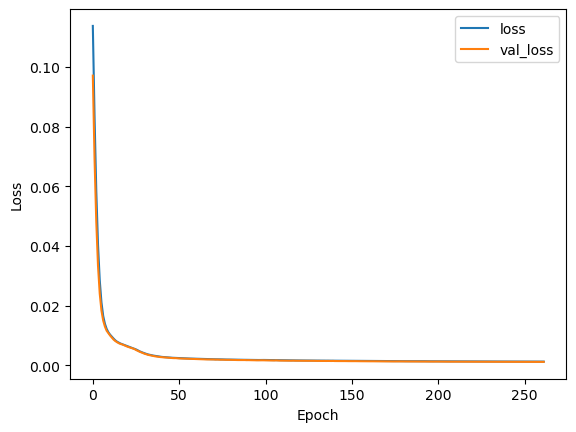

In [6]:
vae.visualize_loss()

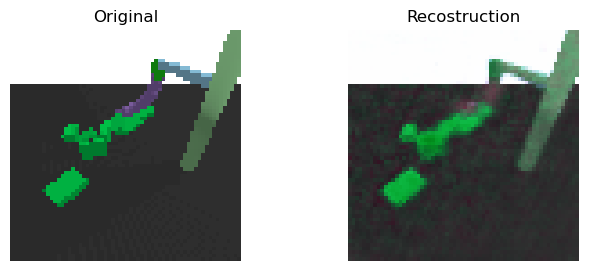

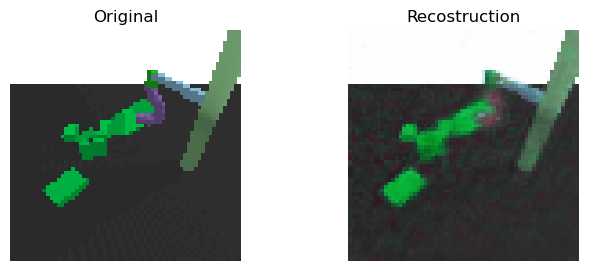

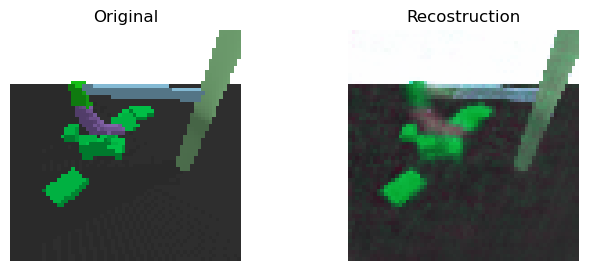

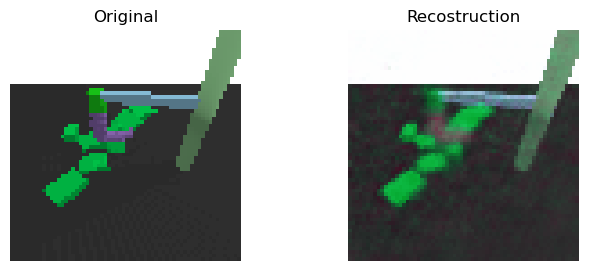

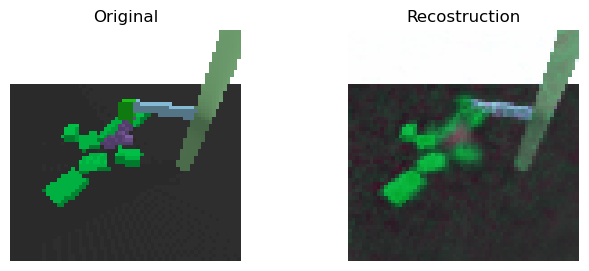

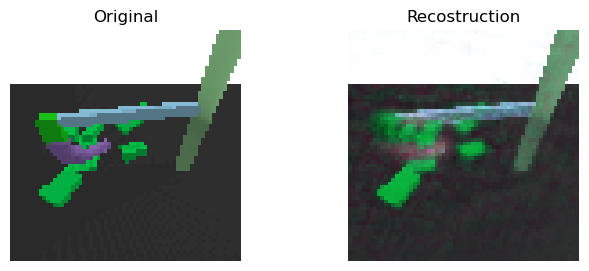

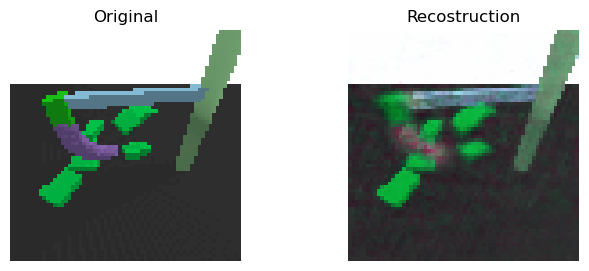

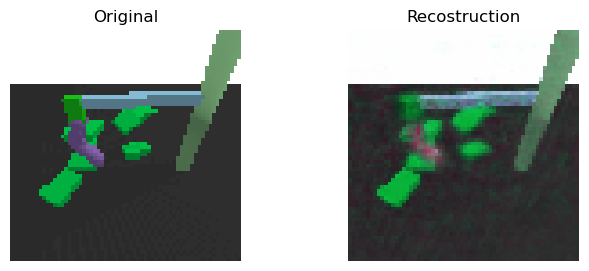

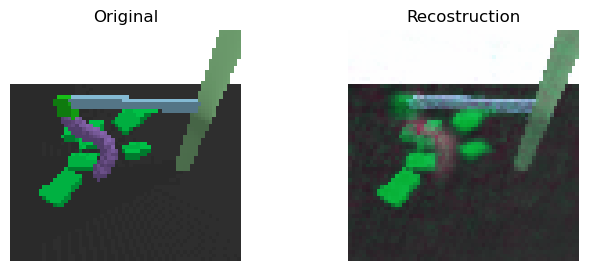

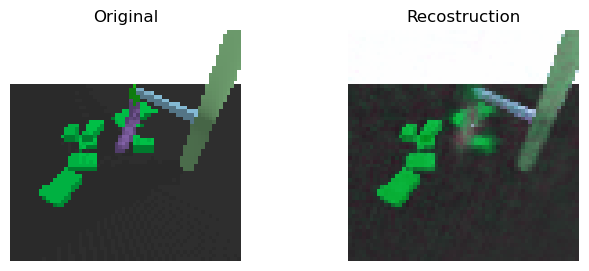

In [7]:
for i in range(10):
    vae.visualize_recostruction(X_train[36+i*47])

In [8]:
X_train_z = vae.compute_latent_vector(X_train)
X_val_z = vae.compute_latent_vector(X_val)
#X_test_z = vae.compute_latent_vector(X_test)

69/69 [==============================] - 5s 70ms/step


In [9]:
save_latent_vectors(X_train_z, None, 'predictions/z_vae_rgb_train_obj.pkl')
save_latent_vectors(X_val_z, None, 'predictions/z_vae_rgb_val_obj.pkl')
#save_latent_vectors(X_test_z, None, 'predictions/z_vae_rgb_test_obj.pkl')

In [10]:
Y_train_z = vae.compute_latent_vector(Y_train)
Y_val_z = vae.compute_latent_vector(Y_val)
#Y_test_z = vae.compute_latent_vector(Y_test)

save_latent_vectors(Y_train_z, None, 'predictions/zY_vae_rgb_train_obj.pkl')
save_latent_vectors(Y_val_z, None, 'predictions/zY_vae_rgb_val_obj.pkl')
#save_latent_vectors(Y_test_z, None, 'predictions/zY_vae_rgb_test_obj.pkl')

69/69 [==============================] - 6s 88ms/step


In [11]:
# save traning data
import pickle

with open('predictions/dataset_obj.pkl', 'wb') as f:
    pickle.dump((X_train, Y_train, cX_train, X_val, Y_val, cX_val), f)

In [12]:
# save history in a file
import pickle

with open('predictions/history_rgb_scale_obj.pkl', 'wb') as file_pi:
    pickle.dump(vae.ae.history, file_pi)

In [13]:
vae.save()

INFO:tensorflow:Assets written to: saved_models/vae_rgb_1280_obj\assets


INFO:tensorflow:Assets written to: saved_models/vae_rgb_1280_obj\assets


In [14]:
from tensorflow.keras.models import save_model

save_model(vae.encoder, 'models/encoder_rgb_obj.h5')
save_model(vae.decoder, 'models/decoder_rgb_obj.h5')
save_model(vae.ae, 'models/ae_rgb_obj.h5')